# Assignment 09

Learning goal: develop confidence working with Google Earth Engine and build comfort working with new datasets.

The tools needed to complete this assignment are largely found within the Intro Python Tutorial that you have gone through.
If you haven't already, please pause, and run through this tutorial, copying each cell block of text from the tutorial
into a new notebook.  Here is the web address to the tutorial: https://developers.google.com/earth-engine/tutorials/community/intro-to-python-api-guiattard

Skim this website to learn the fundamental building blocks (i.e., objects and methods) of EE: 
https://developers.google.com/earth-engine/guides/objects_methods_overview

With the above knowledge, I hope that you will be able to use the [tutorial](https://developers.google.com/earth-engine/tutorials/community/intro-to-python-api-guiattard) 
as something of a guide, and copy, paste, and modify the steps used in the tutorial to meet the specific goals
of this assignment.

As always, post your questions on slack!


In [1]:
import ee

from IPython.display import Image
import pandas as pd

import folium # For super-cool interactive maps

In [2]:
ee.Initialize() # necessary to let Google know who you are, and that you'll be using GEE tools.

## Exploring snow cover in and around Moscow
There is a daily estimate of snow cover from the MODIS Terra satellite,
using a band ratio metric akin to the NDVI we've used previously.  This metric
is known as the Normalized Difference Snow Index (NDSI).  We'll use this NASA
data product, available through Google Earth Engine.

Find the MOD10A1.006 Terra Snow Cover Daily Global 500m within the Earth Engine Data Catalog:
https://developers.google.com/earth-engine/datasets

Review the Bands that are reported for this dataset.  On the Bands page, each Band of the
dataset is named with bold font, and then, to the right of the name, is a range of various
different kinds of information defining what is included in each band.



In [3]:
# Create an ee.ImageCollection variable named "snow"
#   complete the following line of code
snow = ee.ImageCollection("MODIS/006/MOD10A1")

In [4]:
# Find how many images are in the ImageCollection
snow.size().getInfo()

7859

In [5]:
# Use getInfo() to report the contents of the first Image of the 'snow' ImageCollection
snow.first().getInfo()

{'type': 'Image',
 'bands': [{'id': 'NDSI_Snow_Cover',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 255},
   'dimensions': [86400, 43200],
   'crs': 'SR-ORG:6974',
   'crs_transform': [463.312716528,
    0,
    -20015109.354,
    0,
    -463.312716527,
    10007554.677]},
  {'id': 'NDSI_Snow_Cover_Basic_QA',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 255},
   'dimensions': [86400, 43200],
   'crs': 'SR-ORG:6974',
   'crs_transform': [463.312716528,
    0,
    -20015109.354,
    0,
    -463.312716527,
    10007554.677]},
  {'id': 'NDSI_Snow_Cover_Algorithm_Flags_QA',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
    'min': 0,
    'max': 255},
   'dimensions': [86400, 43200],
   'crs': 'SR-ORG:6974',
   'crs_transform': [463.312716528,
    0,
    -20015109.354,
    0,
    -463.312716527,
    10007554.677]},
  {'id': 'NDSI',
   'data_type': {'type': 'PixelType',
    'precision': 'int',
  

oiol./Recognize above that, after `type` (`Image`), the different bands are all identified according to their
`id` (name) and other information about the contents of the band.

We want a simple, straightforward way to assess the percentage of a pixel (500 m x 500 m) that
is snow covered.  So we need to find which band contains this information.  The Google Earth Engine
Data Catalog suggests which band this might be, but it can be a little opaque.  To clarify the contents
of the bands, go to the
National Snow and Ice Data Center (NSIDC- which is a NASA data repository) and is the actual home/source
of this data product.  Earth Engine serves it, but the product is really from NASA and is distributed
by the NSIDC.  There are two ways this can be accessed from Earth Engine.  I've circled and
drawn an arrow next to these options.

<!-- ![title](find_documentation.png) -->
<img src="find_documentation.png" alt="alt text" width="500"/>

Within the NSIDC dataset website, you'll find more information about the origin of the dataset, and
how to use it.  You'll see multiple tabs, starting with "Overview" (basic metadata), "Download
Data" (don't do it!  We're using Earth Engine!!!), "Citing ...", "User Guide," etc.

The User Guide describes the origin of these data, how they were processed, etc.  Give the User Guide
pdf a look on the NSIDC website to decide which band to use going forward, as your best estimate
of snow cover.


### Mean snow cover in Moscow
Find the mean snow cover over all times at location just outside of Moscow.
To avoid any impacts associated with the town itself (i.e., buildings, parking lots, plowing, etc.),
choose a coordinate to `sample` that is just outside the developed regions of the town.  You might
use Google Earth, or some other GIS software, to pick this coordinate.

In [6]:
# Define the location of interest for Moscow.
moscow_lon = -117.03# -117.00
moscow_lat = 46.72#46.732
moscow_lon = -116.98# -117.00
moscow_lat = 46.75#46.732
moscow_poi = ee.Geometry.Point(moscow_lon, moscow_lat)

# Define the operative scale of the dataset.  This is important for defining how EE does its analyses.
#    This should be the resolution of the data product.
scale = 500  # scale in meters


In [7]:
i_date = '2000-02-24' # Start date
f_date = '2021-10-26' # End date

snow = snow.select('NDSI_Snow_Cover').filterDate(i_date, f_date) # Select the NDSI_Snow_Cover band for all available dates

moscow_lon = -116.94 
moscow_lat = 46.78
moscow_poi = ee.Geometry.Point(moscow_lon, moscow_lat) # Generate EarthEngine point just outside of Moscow

snow_moscow_point = round(snow.mean().sample(moscow_poi, scale).first().get('NDSI_Snow_Cover').getInfo(), 2) # Determine the mean snow cover at the point outside Moscow

In [8]:
print('For all dates, the mean snow cover of the point I sampled outside of Moscow is ',snow_moscow_point)

For all dates, the mean snow cover of the point I sampled outside of Moscow is  5.57


### Visualize the mean snow cover

Calculate the mean snow cover of the entire dataset.  For the region around Moscow, plot this mean snow cover.

In [9]:
roi = moscow_poi.buffer(5e4) # Generate region of interest by buffering my point outside of Moscow
snow_img = snow.mean() # Determine mean snow cover for the entire dataset

In [10]:
from IPython.display import Image

# Display mean snow cover around Moscow (50 km)

Image(url = snow_img.getThumbUrl({
    'min': 0, 'max': 10, 'dimensions': 512, 'region': roi,
    'palette': ['blue', 'yellow', 'orange', 'red']}))

In [11]:
# Display mean snow cover around Moscow (100 km)

Image(url = snow_img.getThumbUrl({
    'min': 0, 'max': 10, 'dimensions': 512, 'region': roi,
    'palette': ['blue', 'yellow', 'orange', 'red']}))

#### Set up a Folium map to explore the output data with

In [12]:
elev = ee.Image('USGS/SRTMGL1_003') # Read in the STRM dataset as an EE Image

# Define a method for displaying Earth Engine image tiles to folium map.
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = 'Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

# Add EE drawing method to folium.
folium.Map.add_ee_layer = add_ee_layer

# Create a folium map object.
my_map = folium.Map(location=[46.8, -117], zoom_start=10)

# Set visualization parameters for the elevation dataset
elev_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}
# Add the elevation model to the map object.
my_map.add_ee_layer(elev, elev_params, 'DEM')

# Add a layer control panel to the map.
# my_map.add_child(folium.LayerControl())
folium.LayerControl(collapsed = False).add_to(my_map)

# Display the map.
display(my_map)

### Interpretting the snow cover
Add a layer to the Folium map above that includes the mean of all the snow cover measurements.
Note in the map above there there are only a few lines used to define the `elev_params` and then one 
line that uses `add_ee_layer` to add the `elev` dataset to the map.  You can reproduce (and modify)
these lines to show your map of mean snow cover.

Write a few sentences to interpret the spatial patterns in mean snow cover in the several 10s of km
basin surrounding Moscow.

In [13]:
# Create a folium map object.
my_map = folium.Map(location=[46.8, -117], zoom_start=10)

# Set visualization parameters for the elevation dataset
elev_params = {
  'min': 0,
  'max': 4000,
  'palette': ['006633', 'E5FFCC', '662A00', 'D8D8D8', 'F5F5F5']}
# Add the elevation model to the map object.
my_map.add_ee_layer(elev, elev_params, 'DEM')

# Set visualization parameters for the mean snow cover dataset
snow_params = {
  'min': 0,
  'max': 10,
  'palette': ['blue', 'yellow', 'orange', 'red']}

# Add the mean snow cover tile to the map object
my_map.add_ee_layer(snow_img, snow_params, 'Mean Snow Cover')

# Add a layer control panel to the map
folium.LayerControl(collapsed = False).add_to(my_map)

# Display the map
display(my_map)

* As expected, the mean snow cover is lower at low-lying areas (blues), such as river basins; similarly, the snow cover is greatest at topographic highs (reds), such as Moscow Mountain and the Rockies. Immediately surrounding Moscow, the snow cover is farily uniform, which is likely due to consistent topography (rolling hills, plains). The spatial pattern of mean snow cover is most definitely related to elevation and the temperatures associated with these elevations.

## Examining time series of snow cover around Moscow
Your goal now is to produce a time series of snow cover (from MODIS NDSI) near Moscow (but again, just outside Moscow, to
avoide city effects).

Again, following the example from the [Python API tutorial](https://developers.google.com/earth-engine/tutorials/community/intro-to-python-api-guiattard).
Produce an array (technically a list of lists in this case) with all of the snow cover measurements of your Moscow
coordinates.

In [15]:
type(snow)

ee.imagecollection.ImageCollection

In [17]:
moscow_poi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Point",
    "arguments": {
      "coordinates": {
        "constantValue": [
          -116.94,
          46.78
        ]
      }
    }
  }
})

In [18]:
snow_moscow_poi = snow.getRegion(moscow_poi, scale).getInfo() # Get the data for the pixel intersecting the point outside Moscow
snow_moscow_poi[:3]

[['id', 'longitude', 'latitude', 'time', 'NDSI_Snow_Cover'],
 ['2000_02_24', -116.94043789846901, 46.78201420873438, 951350400000, None],
 ['2000_02_25', -116.94043789846901, 46.78201420873438, 951436800000, 14]]

In [19]:
# Function to transform the EE array (list of lists) into a pandas dataframe
def ee_array_to_df(arr, list_of_bands):
    """Transforms client-side ee.Image.getRegion array to pandas.DataFrame."""
    df = pd.DataFrame(arr)

    # Rearrange the header.
    headers = df.iloc[0]
    df = pd.DataFrame(df.values[1:], columns=headers)

    # Remove rows without data inside.
    df = df[['longitude', 'latitude', 'time', *list_of_bands]].dropna()

    # Convert the data to numeric values.
    for band in list_of_bands:
        df[band] = pd.to_numeric(df[band], errors='coerce')

    # Convert the time field into a datetime.
    df['datetime'] = pd.to_datetime(df['time'], unit='ms')

    # Keep the columns of interest.
    df = df[['time','datetime',  *list_of_bands]]

    return df

Use the function above to create a DataFrame that includes snow cover as a function of time.  Show
that DataFrame below.

In [20]:
snow_df_moscow = ee_array_to_df(snow_moscow_poi,['NDSI_Snow_Cover']) # Use function above to convert the EE array to a pandas DataFrame
snow_df_moscow.head()

,time,datetime,NDSI_Snow_Cover
1,951436800000,2000-02-25,14
15,952646400000,2000-03-10,0
17,952819200000,2000-03-12,0
28,953769600000,2000-03-23,0
31,954028800000,2000-03-26,0


Create a plot of the snow cover as a function of time, for the full time series, up to the present.

In [22]:
%matplotlib widget
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(snow_df_moscow['datetime'], snow_df_moscow['NDSI_Snow_Cover']) # Scatter snow cover as a function of time

ax.set_title('Snow Cover (NDSI) near Moscow, ID', fontsize=16, weight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Snow Cover (NDSI)', fontsize=12)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'Snow Cover (NDSI)')

### Commonality of early snowfalls

Last year, in 2020, a heavy snow fell on October 23-24, while there were still many leaves on
the trees.  This caused power outages and brought down many many tree limbs across Moscow (see
evidence of this below, with a truck ready to head for one of Many trips to the city's yard
waste dump that day).

<img src="early_snow.jpg" alt="alt text" width="500"/>

How typical are these early season snow storms in Moscow?  Has there been October snow
accumulation in any of the prior 5 or so years?

These early season snowstorms are rare occurences in Moscow. Besides the 2020 snowstorm, there was only one other large snow event (October 18, 2017) in October, since 2000.


,level_0,index,time,datetime,NDSI_Snow_Cover
2730,2730,6390,1508284800000,2017-10-18,57
3197,3197,7493,1603584000000,2020-10-25,74
3198,3198,7495,1603756800000,2020-10-27,79
3199,3199,7496,1603843200000,2020-10-28,64


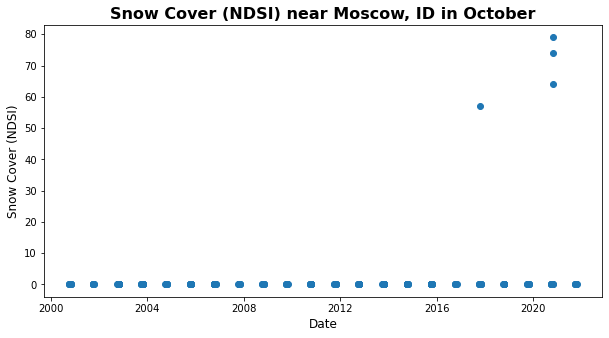

In [139]:
snow_df_moscow.reset_index(inplace = True) # Reset index for easier processing
months = [str(snow_df_moscow['datetime'][x])[5:7] for x in snow_df_moscow.index] # List comprehension which determines the month for measurment
snow_df = snow_df_moscow.iloc[np.where([months[x] == '10' for x in range(len(months))])] # Create new dataframe for all measurements in the month of October

fig, ax = plt.subplots(figsize=(10,5))

ax.scatter(snow_df['datetime'], snow_df['NDSI_Snow_Cover']) # Scatter plot all October data

ax.set_title('Snow Cover (NDSI) near Moscow, ID in October', fontsize=16, weight='bold')
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Snow Cover (NDSI)', fontsize=12)

print('These early season snowstorms are rare occurences in Moscow. Besides the 2020 snowstorm, there was only one other large snow event (October 18, 2017) in October, since 2000.')

snow_df[snow_df['NDSI_Snow_Cover'] > 10] # Copy of Dataframe containing all large snow events during October, since 2000

### Optional: Seasonal cycle of snow cover in Moscow
Make a plot of a typical year, and plot each year's snow cover record on this single, 12 month axis.
I'm thinking of something along the lines of the National Snow and Ice Data Center's
[Charctic Interactive Sea Ice Graph](https://nsidc.org/arcticseaicenews/charctic-interactive-sea-ice-graph/), 
in which an entire time series is plotted on one year, to facilitate comparison and identify typical
patterns.

Tweak the graph you make of the annual snow cover so that it shows the average snow cover
as a function of day.  

